<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.476800,84.183788,63.096307,-0.000093,252.756802,252.756780,0.000022
1,0.0,1.0,52.150686,46.624257,56.531998,0.000271,165.307213,165.307225,-0.000012
2,0.0,2.0,31.046068,53.817741,66.673972,-0.000444,161.537337,161.538007,-0.000670
3,0.0,3.0,27.939465,73.887138,25.357003,0.000034,137.183640,137.183886,-0.000246
4,0.0,4.0,81.744835,90.910981,27.190549,0.000080,209.846444,209.846399,0.000046
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.308617,22.280063,51.177664,-0.002844,169.763500,169.766272,-0.002772
29996,999.0,26.0,70.450954,77.032384,47.378362,-0.000016,204.861683,204.861607,0.000076
29997,999.0,27.0,44.879446,43.931199,21.972813,-0.000509,120.782949,120.783779,-0.000830
29998,999.0,28.0,78.511238,88.028553,74.400383,-0.000093,250.940081,250.939837,0.000245


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    95.476800  84.183788  63.096307 -0.000093  252.756802   
      1.0    52.150686  46.624257  56.531998  0.000271  165.307213   
      2.0    31.046068  53.817741  66.673972 -0.000444  161.537337   
      3.0    27.939465  73.887138  25.357003  0.000034  137.183640   
      4.0    81.744835  90.910981  27.190549  0.000080  209.846444   
...                ...        ...        ...       ...         ...   
999.0 25.0   86.308617  22.280063  51.177664 -0.002844  169.763500   
      26.0   70.450954  77.032384  47.378362 -0.000016  204.861683   
      27.0   44.879446  43.931199  21.972813 -0.000509  120.782949   
      28.0   78.511238  88.028553  74.400383 -0.000093  250.940081   
      29.0   34.638070  22.834861  37.464831  0.000247  104.938010   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    252.756780  0.000022  
      1.0    165.307225 -0.000012  
      2.0    161.538007 -0.000670  
      3.0    137.183886 -0.000246  
      4.0    209.846399  0.000046  
...                 ...       ...  
999.0 25.0   169.766272 -0.002772  
      26.0   204.861607  0.000076  
      27.0   120.783779 -0.000830  
      28.0   250.939837  0.000245  
      29.0   104.938118 -0.000109  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    95.476800  84.183788  63.096307 -0.000093  252.756802   
      1.0    52.150686  46.624257  56.531998  0.000271  165.307213   
      2.0    31.046068  53.817741  66.673972 -0.000444  161.537337   
      3.0    27.939465  73.887138  25.357003  0.000034  137.183640   
      4.0    81.744835  90.910981  27.190549  0.000080  209.846444   
...                ...        ...        ...       ...         ...   
999.0 25.0   86.308617  22.280063  51.177664 -0.002844  169.763500   
      26.0   70.450954  77.032384  47.378362 -0.000016  204.861683   
      27.0   44.879446  43.931199  21.972813 -0.000509  120.782949   
      28.0   78.511238  88.028553  74.400383 -0.000093  250.940081   
      29.0   34.638070  22.834861  37.464831  0.000247  104.938010   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    252.756780  0.000022  
      1.0    165.307225 -0.000012  
      2.0    161.538007 -0.000670  
      3.0    137.183886 -0.000246  
      4.0    209.846399  0.000046  
...                 ...       ...  
999.0 25.0   169.766272 -0.002772  
      26.0   204.861607  0.000076  
      27.0   120.783779 -0.000830  
      28.0   250.939837  0.000245  
      29.0   104.938118 -0.000109  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.476800,84.183788,63.096307,-0.000093,252.756802,252.756780,0.000022
1,0.0,1.0,52.150686,46.624257,56.531998,0.000271,165.307213,165.307225,-0.000012
2,0.0,2.0,31.046068,53.817741,66.673972,-0.000444,161.537337,161.538007,-0.000670
3,0.0,3.0,27.939465,73.887138,25.357003,0.000034,137.183640,137.183886,-0.000246
4,0.0,4.0,81.744835,90.910981,27.190549,0.000080,209.846444,209.846399,0.000046
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.308617,22.280063,51.177664,-0.002844,169.763500,169.766272,-0.002772
29996,999.0,26.0,70.450954,77.032384,47.378362,-0.000016,204.861683,204.861607,0.000076
29997,999.0,27.0,44.879446,43.931199,21.972813,-0.000509,120.782949,120.783779,-0.000830
29998,999.0,28.0,78.511238,88.028553,74.400383,-0.000093,250.940081,250.939837,0.000245


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    95.476800  84.183788  63.096307 -0.000093  252.756802   
      1.0    52.150686  46.624257  56.531998  0.000271  165.307213   
      2.0    31.046068  53.817741  66.673972 -0.000444  161.537337   
      3.0    27.939465  73.887138  25.357003  0.000034  137.183640   
      4.0    81.744835  90.910981  27.190549  0.000080  209.846444   
...                ...        ...        ...       ...         ...   
999.0 25.0   86.308617  22.280063  51.177664 -0.002844  169.763500   
      26.0   70.450954  77.032384  47.378362 -0.000016  204.861683   
      27.0   44.879446  43.931199  21.972813 -0.000509  120.782949   
      28.0   78.511238  88.028553  74.400383 -0.000093  250.940081   
      29.0   34.638070  22.834861  37.464831  0.000247  104.938010   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    252.756780  0.000022  
      1.0    165.307225 -0.000012  
      2.0    161.538007 -0.000670  
      3.0    137.183886 -0.000246  
      4.0    209.846399  0.000046  
...                 ...       ...  
999.0 25.0   169.766272 -0.002772  
      26.0   204.861607  0.000076  
      27.0   120.783779 -0.000830  
      28.0   250.939837  0.000245  
      29.0   104.938118 -0.000109  

[30000 rows x 7 columns]

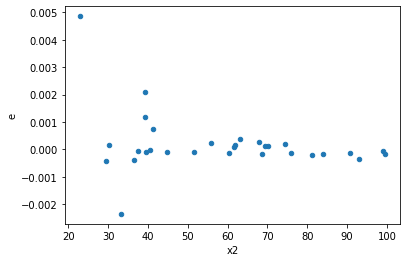

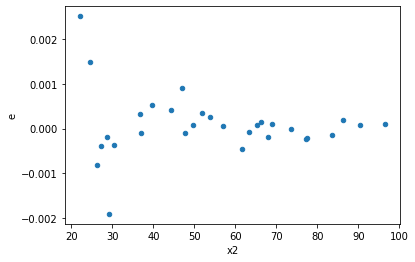

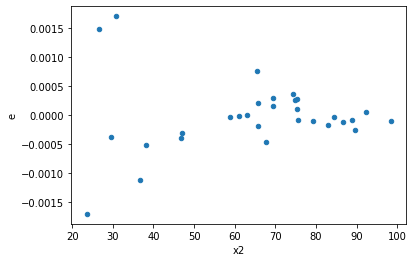

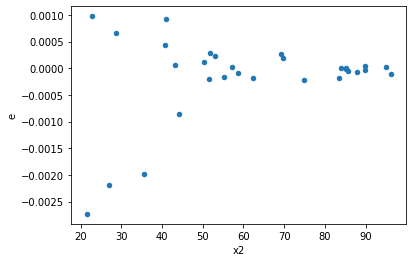

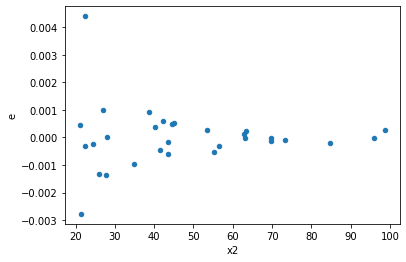

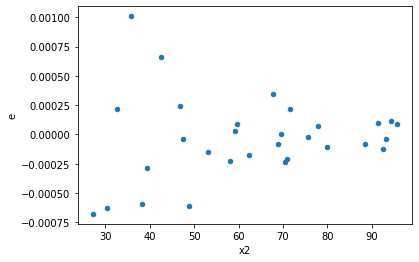

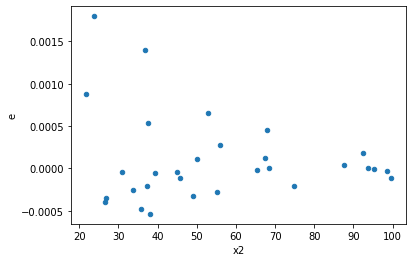

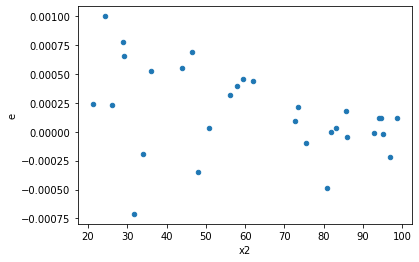

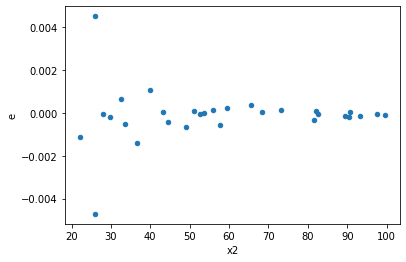

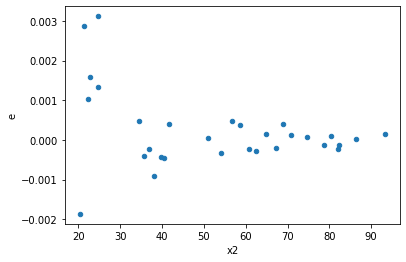

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,16.0,8.0,1.4888342044465823e-06,3.645071642634249e-06,9.305213777791139e-08,4.556339553292811e-07,4.896544735132769,0.0285325602840949,0.9857337198579526,0.01426628014204745,Reject005=0 : Heteroscedasticity
2.0,11.0,13.0,8.346455319969132e-07,5.946625504400407e-06,7.587686654517393e-08,4.5743273110772363e-07,6.028619155423178,0.0032235945711029945,0.9983882027144485,0.0016117972855514973,Reject005=0 : Heteroscedasticity
3.0,12.0,12.0,1.5607288693843191e-06,5.84828323878214e-06,1.3006073911535993e-07,4.873569365651783e-07,3.7471487543439803,0.030145368543046613,0.9849273157284767,0.015072684271523307,Reject005=0 : Heteroscedasticity
8.0,15.0,9.0,1.098619099160782e-06,1.8076206337260784e-06,7.324127327738546e-08,2.0084673708067539e-07,2.742261679695434,0.13017133679532078,0.9349143316023396,0.06508566839766039,Reject005=1 : Homoscedasticity
9.0,16.0,8.0,7.151994303570816e-07,1.2817675362612156e-06,4.46999643973176e-08,1.6022094203265195e-07,3.5843639741750364,0.07281731642148781,0.9635913417892561,0.036408658210743905,Reject005=1 : Homoscedasticity
10.0,7.0,17.0,3.2745930581593493e-06,2.6705094148560278e-05,4.677990083084785e-07,1.570887891091781e-06,3.358040233501089,0.03899605613493362,0.9805019719325332,0.01949802806746681,Reject005=0 : Heteroscedasticity
11.0,17.0,7.0,6.115613380916668e-06,6.045025925674228e-06,3.5974196358333337e-07,8.635751322391754e-07,2.400540441924647,0.24244042570539048,0.8787797871473048,0.12122021285269524,Reject005=1 : Homoscedasticity
12.0,9.0,15.0,4.993315909927475e-07,1.0059099954016506e-05,5.548128788808305e-08,6.706066636011003e-07,12.0870781686584,4.401019061228695e-05,0.9999779949046939,2.2005095306143474e-05,Reject005=0 : Heteroscedasticity
15.0,16.0,8.0,1.8253791914487391e-06,1.0456668056154166e-06,1.140861994655462e-07,1.3070835070192708e-07,1.1456981765914704,0.8833111461460001,0.5583444269269999,0.4416555730730001,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,16.0,8.0,3.956957461861315e-06,1.48277145247662e-06,2.473098413663322e-07,1.853464315595775e-07,0.7494502868773012,0.5917364536500839,Reject005=1 : Homoscedasticity
1.0,16.0,8.0,1.4888342044465823e-06,3.645071642634249e-06,9.305213777791139e-08,4.556339553292811e-07,4.896544735132769,0.0285325602840949,Reject005=0 : Heteroscedasticity
2.0,11.0,13.0,8.346455319969132e-07,5.946625504400407e-06,7.587686654517393e-08,4.5743273110772363e-07,6.028619155423178,0.0032235945711029945,Reject005=0 : Heteroscedasticity
3.0,12.0,12.0,1.5607288693843191e-06,5.84828323878214e-06,1.3006073911535993e-07,4.873569365651783e-07,3.7471487543439803,0.030145368543046613,Reject005=0 : Heteroscedasticity
4.0,8.0,16.0,2.9179857168097945e-06,1.3975787461523327e-06,3.647482146012243e-07,8.734867163452079e-08,0.2394766256224674,0.04651250951820763,Reject005=0 : Heteroscedasticity
5.0,12.0,12.0,9.357498778047685e-06,2.585047183673896e-06,7.79791564837307e-07,2.1542059863949132e-07,0.27625407654215384,0.03444627843535441,Reject005=0 : Heteroscedasticity
6.0,8.0,16.0,8.764259585215305e-06,9.658424456354773e-06,1.0955324481519131e-06,6.036515285221733e-07,0.5510120029219503,0.39652706579277663,Reject005=1 : Homoscedasticity
7.0,8.0,16.0,2.0176820243723703e-05,5.447711385454328e-07,2.522102530465463e-06,3.404819615908955e-08,0.013499925458147743,1.2844699702767255e-06,Reject005=0 : Heteroscedasticity
8.0,15.0,9.0,1.098619099160782e-06,1.8076206337260784e-06,7.324127327738546e-08,2.0084673708067539e-07,2.742261679695434,0.13017133679532078,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    657
Reject005=1 : Homoscedasticity      343
Name: Result_test, dtype: int64